# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

----
## Get the Data

In [2]:
ad_data = pd.read_csv("advertising.csv")

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


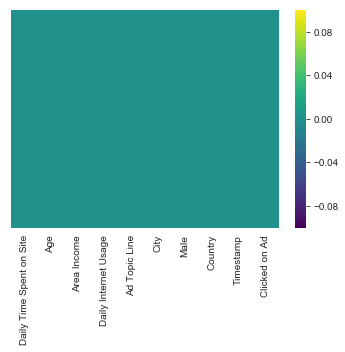

In [6]:
sns.heatmap(ad_data.isnull(), yticklabels = False, cmap = "viridis")

We see 1000 complete observations in this dataset. No missing data to report, which means we are clear to move on to the data cleaning and categorical conversion component of this project.

-----

## Data Cleaning and Conversion

This dataset contains **Timestamp** data for each respondent - Date and Time. Intuitively, this information is valuable to further our insight into consumer engagement; however, it is too granular to include in its present form (in other words, we would end up with 1000 factor levels, which doesn't help us in predicting whether or not a consumer clicks on an advertisement).
<br> <br>
Instead, we'll convert this column to the **day of the week** that the consumer's information was logged. This will split the difference, and provide us with adequate granularity without going overboard.

In [7]:
# Grab the column from the data frame
dates = pd.to_datetime(ad_data["Timestamp"])

dates.head()

0   2016-03-27 00:53:11
1   2016-04-04 01:39:02
2   2016-03-13 20:35:42
3   2016-01-10 02:31:19
4   2016-06-03 03:36:18
Name: Timestamp, dtype: datetime64[ns]

In [8]:
# Convert longform date to day of the week
dates = dates.dt.weekday_name

In [9]:
dates.head()

0    Sunday
1    Monday
2    Sunday
3    Sunday
4    Friday
Name: Timestamp, dtype: object

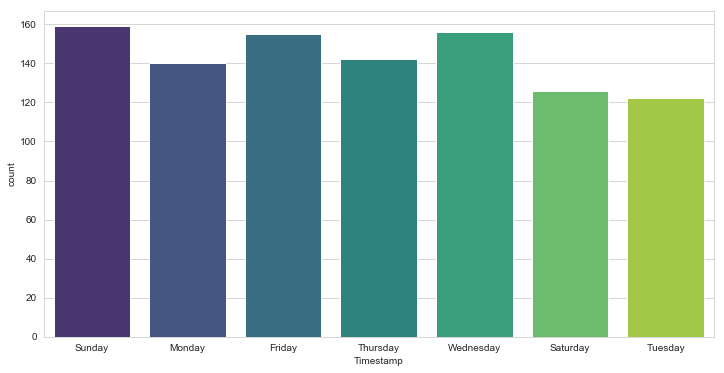

In [10]:
plt.figure(figsize = (12,6))
sns.countplot(dates, palette = "viridis")

Lovely! We observe that the consumer data in this sample is fairly balanced across each day of the week.
<br> <br>
Next we'll need to convert these values to factor levels. Since there are 7 factor levels we can provide each level with its own column in the dataset - we won't need to account for multicollinearity in this case.

In [11]:
dates_dummies = pd.get_dummies(dates)

We'll wait to add these columns to the data frame until we begin the model construction.

----

## Exploratory Data Analysis

** *Create a histogram of the Age* **

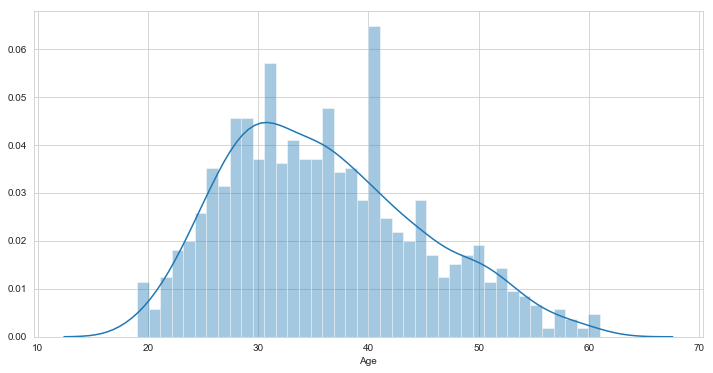

In [12]:
plt.figure(figsize=(12,6))
sns.distplot(ad_data["Age"], bins = 40)

In [13]:
ad_data["Age"].mean()

36.009

We observe an age distribution that is slightly right-skewed, with a large spike in **41 year old** respondents. The mean age of respondents is around **36 years old**, which suggests that older respondents are not as well represented in the present sample.

** *Create a jointplot showing Area Income versus Age.* **

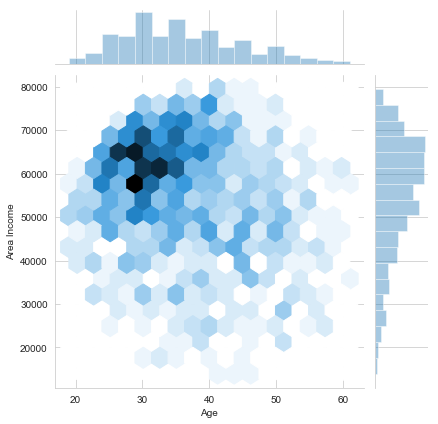

In [14]:
sns.jointplot(data = ad_data, x = "Age", y = "Area Income", kind = "hex")

Interestingly, younger respondents in this sample seem to occupy more affluent areas. This could be driven by lifestyle, as older respondents may be less likely to live in bustling, high income, urban areas. Then again, affluent subruban areas may debunk this hypothesis.

** *Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.* **

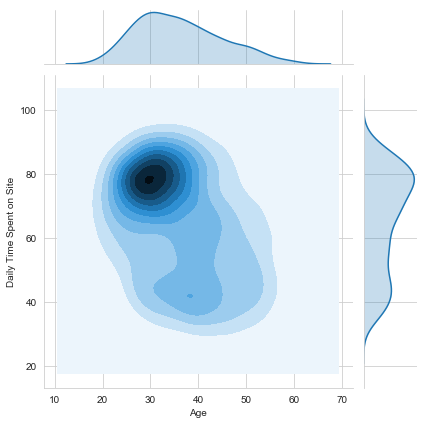

In [15]:
sns.jointplot(data = ad_data, x = "Age", y = "Daily Time Spent on Site", kind = "kde")

We observed the highest density in this plot to be right around age 30. There seems to be a slightly negative correlation between age and time spent on the site, such that older respondents spend less time than younger respondents. 

** *Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'* **

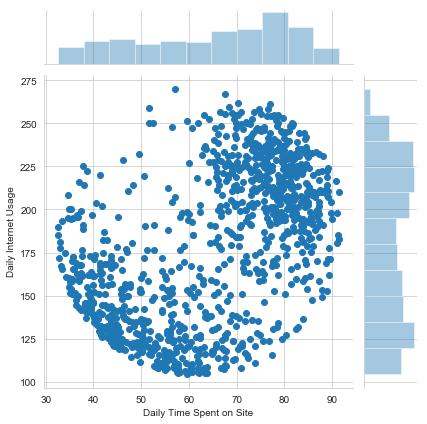

In [16]:
sns.jointplot(data = ad_data, x = "Daily Time Spent on Site", y = "Daily Internet Usage")

In [17]:
np.corrcoef(ad_data["Daily Time Spent on Site"], ad_data["Daily Internet Usage"])[0,1].round(3)

0.519

This is an interesting *non-linear* positive correlation. We observe that more daily time spent on the site generally indicates more daily time spent on the internet in general - however, this relationship is much more nuanced on the lower-end of the "daily site" spectrum.

** *Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.* **

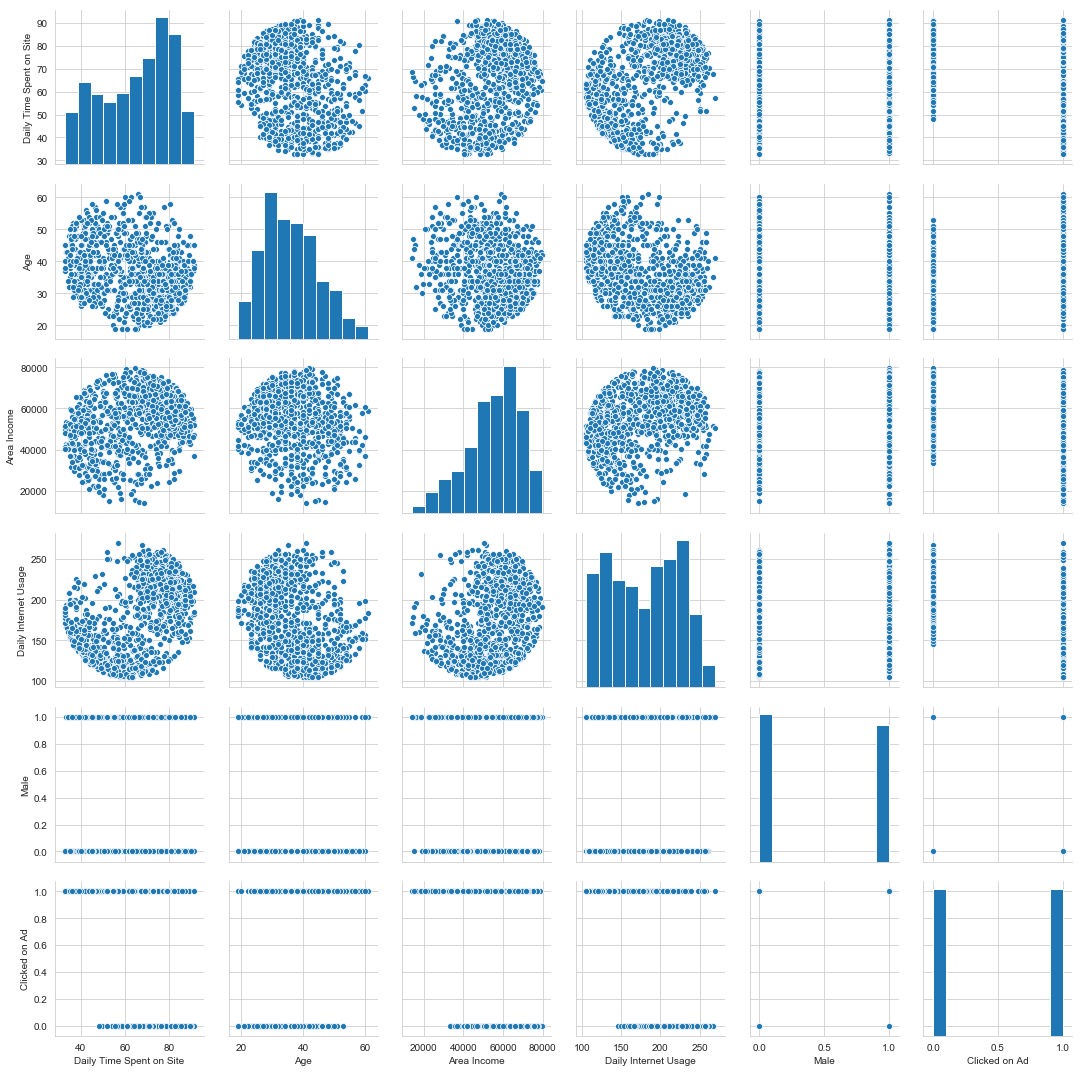

In [18]:
sns.pairplot(ad_data)

We observe that each variable has a uniquely skewed distribution. Age has been discussed previously, please see above.
<br> <br>
* **Daily Time Spent on Site:** This distribution is significantly left-skewed and bimodal
* **Area Income:** This distribution is right-skewed and unimodal
* **Daily Internet Usage:** This distribution doesn't demonstrate significant skewness, though it is massively bimodal

----

# Logistic Regression

** *Split the data into training set and testing set using train_test_split* **

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
list(ad_data.columns)

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Ad Topic Line',
 'City',
 'Male',
 'Country',
 'Timestamp',
 'Clicked on Ad']

There are several variables here that need to be removed prior to analysis - e.g., City and country, as well as the longform timestamp variable that we converted earlier. We'll also need to join the dummy factor levels to the main dataset before we can use them in the model.

In [21]:
ad_data.drop(["City","Timestamp","Ad Topic Line","Country"], axis = 1, inplace = True)

ad_data = pd.concat([ad_data, dates_dummies], axis = 1)

In [22]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,68.95,35,61833.90,256.09,0,0,0,0,0,1,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,1,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,1,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,1,0,0,0
4,68.37,35,73889.99,225.58,0,0,1,0,0,0,0,0,0


Great! We're left with only categorical and numeric factors, all of which are quite usable in a logistic regression model. Our next step is to split the data into **training** and **test** segments - we'll stratify 30% of the data for the test size.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop(["Clicked on Ad"], axis = 1),
                                                   ad_data["Clicked on Ad"],
                                                   test_size = 0.3,
                                                   random_state = 823)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

-----

## Predictions and Evaluations
** *Now predict values for the testing data.* **

In [24]:
preds = model.predict(X_test)

** *Create a classification report for the model.* **

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       144
           1       0.95      0.89      0.92       156

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



----

## Discussion
The present model demonstrates **92% precision**, which is adequate but not exhaustive. There are several avenues that could provide a boost in predictive efficacy. We'll discuss these below.
<br>
* **Ad Topic Line:** The actual content of the ads consumers are clicking on could certainly provide insight into what drives consumer interaction (and, notbaly, what does not). For the sake of parsimony, this factor was not explored farther in the present analysis. <br> <br>
* **Geography:** It's possible that there are geographic drivers of ad engagement. Again, this factor was removed for the sake of parsimony; 237 unique countries would leave us with far too many factor levels, at least in this analysis. Future research should employ some means of regional grouping to assess whether or not these factors are significant.



## Great Job!